## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26,

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
# Uncomment and execute the code snippets below if the data is stored in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import the data
visa = pd.read_csv('/content/drive/My Drive/Python/ML/EasyVisa.csv')

In [ ]:
# Copying data to another variable to avoid making changes to the original data
data = visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##View top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()  ##View last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape ##View dimensions of the data

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe().T ##To print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
# checking the number of unique values
data["case_id"].nunique() ##Check unique values in the mentioned column

25480

In [ ]:
data.drop(["case_id"], axis=1, inplace=True) ##Drop 'case_id' column from the data

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

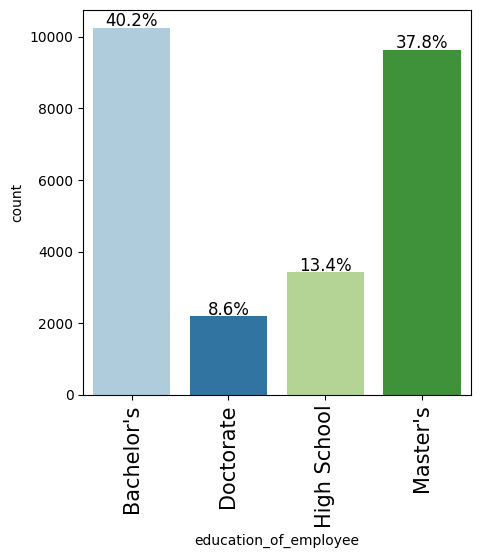

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True) #to create labeled_barplot for education of employee

#### Observations on region of employment

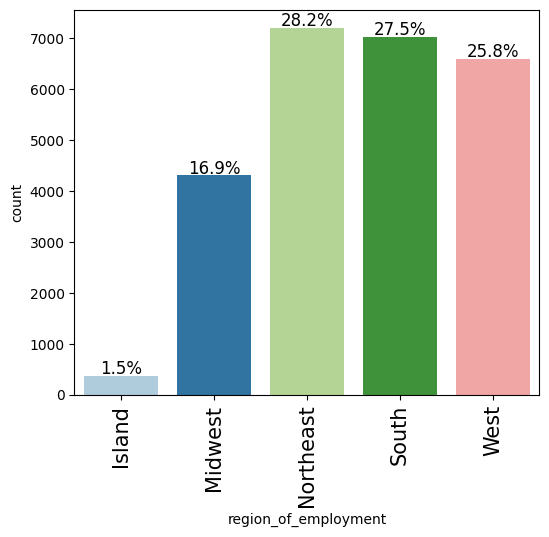

In [ ]:
labeled_barplot(data,"region_of_employment",perc=True)  #to create labeled_barplot for region of employment

#### Observations on job experience

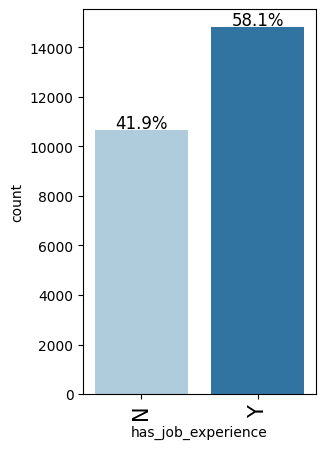

In [ ]:
labeled_barplot(data,"has_job_experience",perc=True) ##To create labeled_barplot for job experience

#### Observations on case status

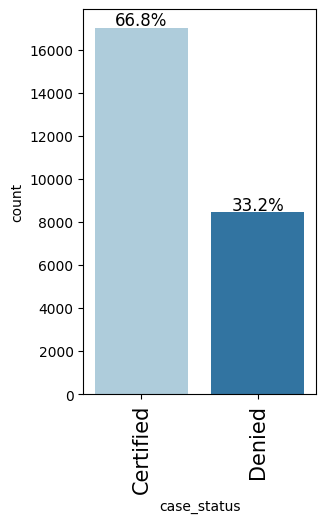

In [ ]:
labeled_barplot(data, "case_status", perc=True) ##To create labeled_barplot for case status

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation Check

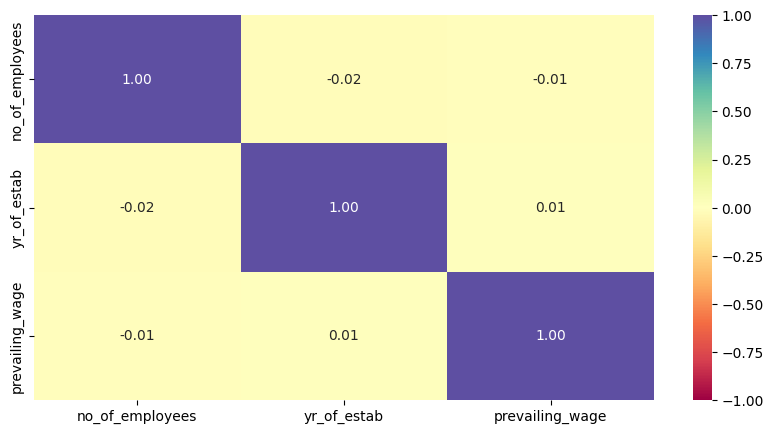

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


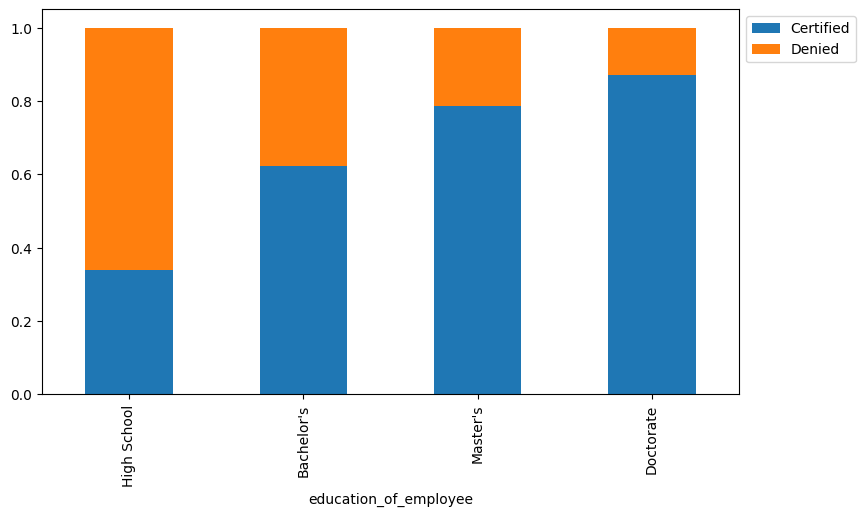

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status") #Create barplot for education and case status

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


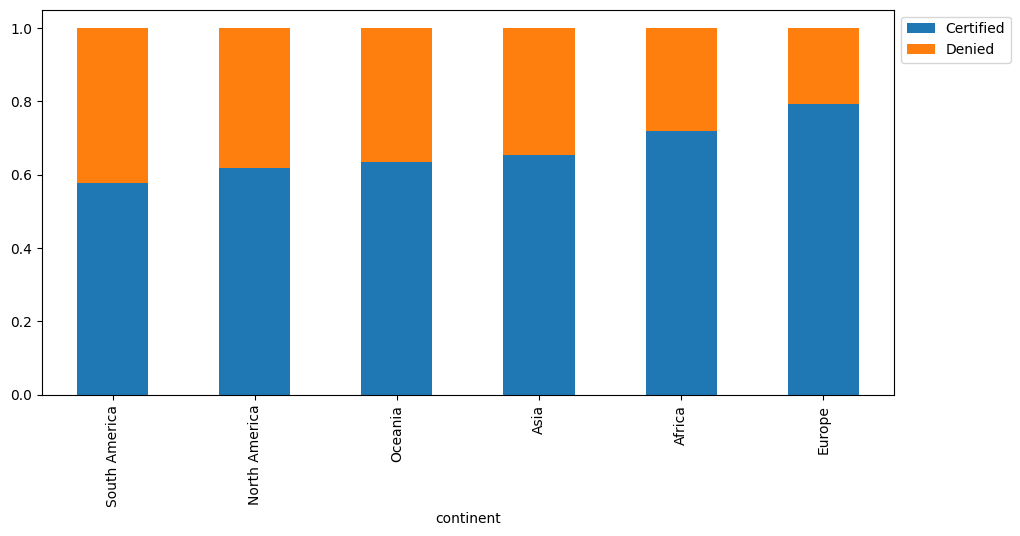

In [ ]:
stacked_barplot(data,"continent","case_status") ##to plot stacked barplot for continent and case status

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


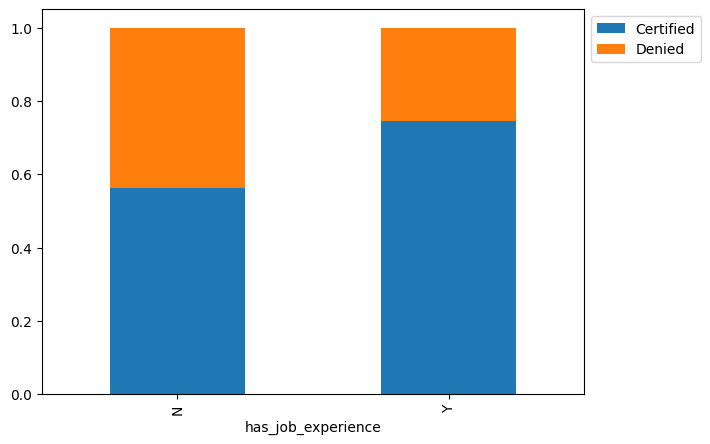

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status") ##to plot stacked barplot for case status and job experience

#### Is the prevailing wage consistent across all regions of the US?

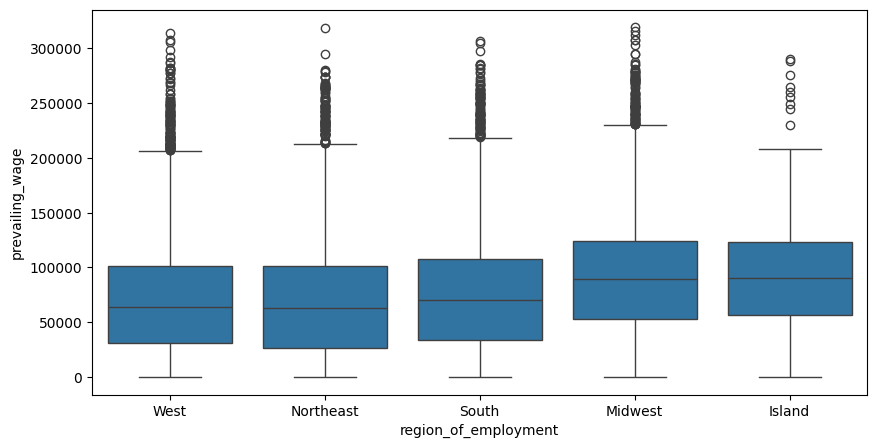

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage") ##create boxplot for region of employment and prevailing wage
plt.show()

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

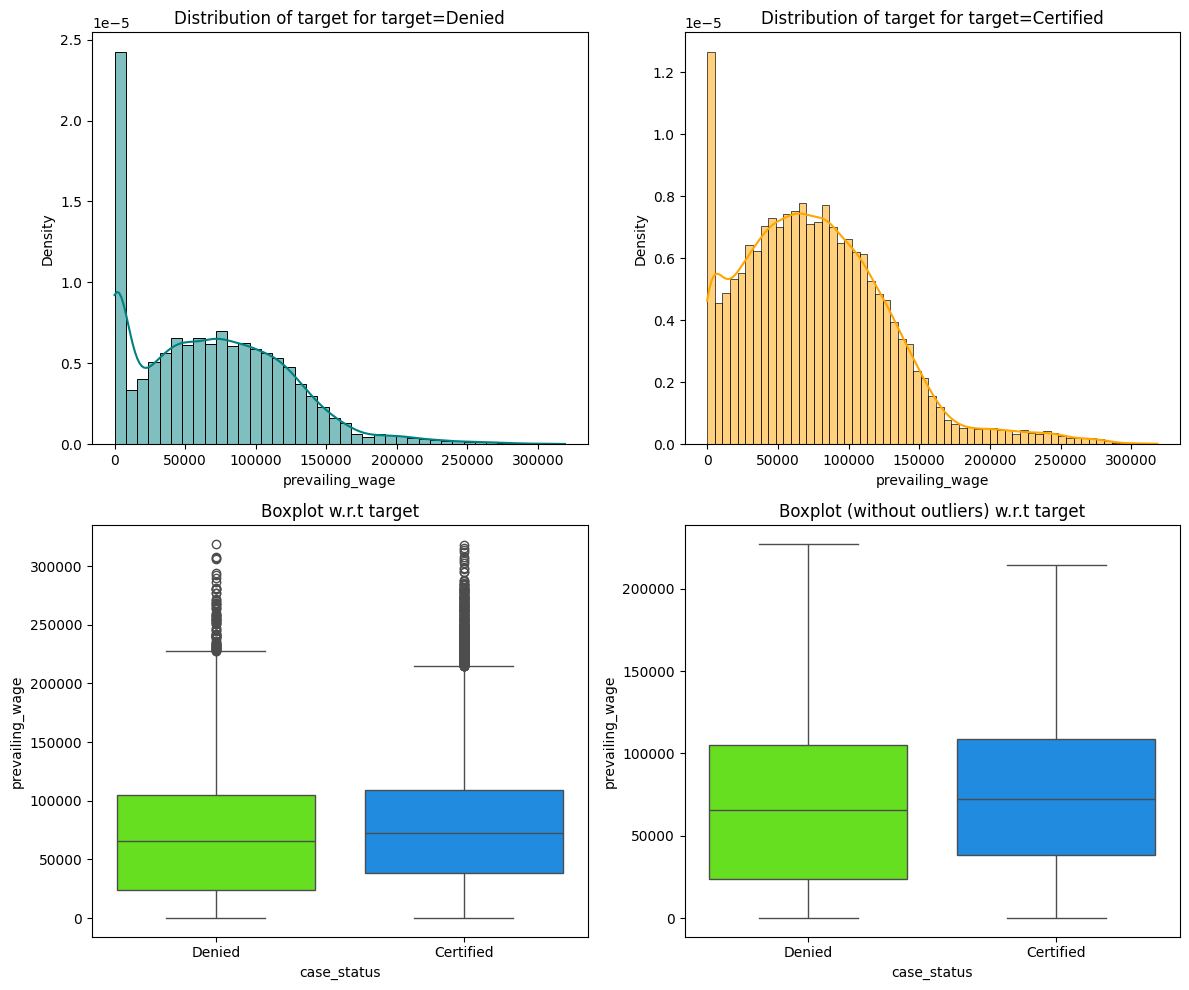

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status") ##find distribution of prevailing wage and case status

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


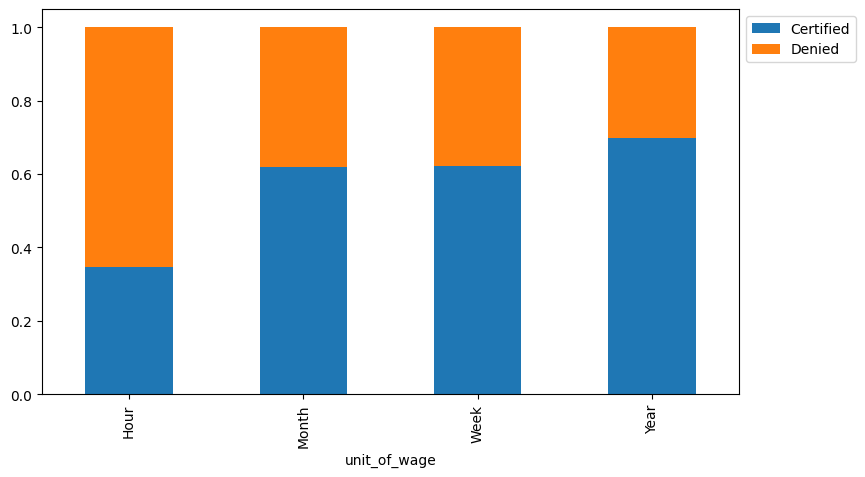

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status") ##plot stacked barplot for unit of wage and case status

## Data Pre-processing

### Outlier Check

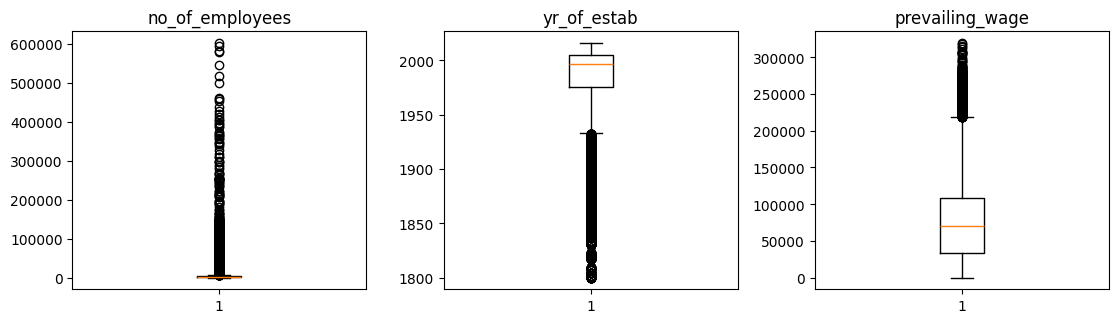

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert the target variable 'case_status' to binary:
# 1 if status is 'Certified', else 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Separate features (X) and target variable (y)
X = data.drop(['case_status'], axis=1)
y = data["case_status"]

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Further split validation set into validation (90%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=1/10, random_state=1, stratify=y_val
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
from sklearn import metrics

scorer = metrics.make_scorer(metrics.precision_score)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []     # Empty list to store names of the models

print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    try:
        kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)  # reduce to 3 splits for safety
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
        )
        results1.append(cv_result)
        names.append(name)
        print(f"{name}: {cv_result.mean():.4f}")
    except Exception as e:
        print(f"{name}: Failed during CV - {e}")
        results1.append(None)
        names.append(name)

print("\nValidation Performance:\n")

for name, model in models:
    try:
        model.fit(X_train, y_train)

        # Choose the correct scoring function based on your metric
        # Example here uses f1_score
        y_pred = model.predict(X_val)
        scores = f1_score(y_val, y_pred)

        print(f"{name}: {scores:.4f}")
    except Exception as e:
        print(f"{name}: Failed during validation - {e}")



Cross-Validation performance on training dataset:

Bagging: 0.7746
Random forest: 0.7715
GBM: 0.7785
Adaboost: 0.7623
Xgboost: 0.7673
dtree: 0.7426

Validation Performance:

Bagging: 0.7676
Random forest: 0.7972
GBM: 0.8196
Adaboost: 0.8158
Xgboost: 0.8070
dtree: 0.7477


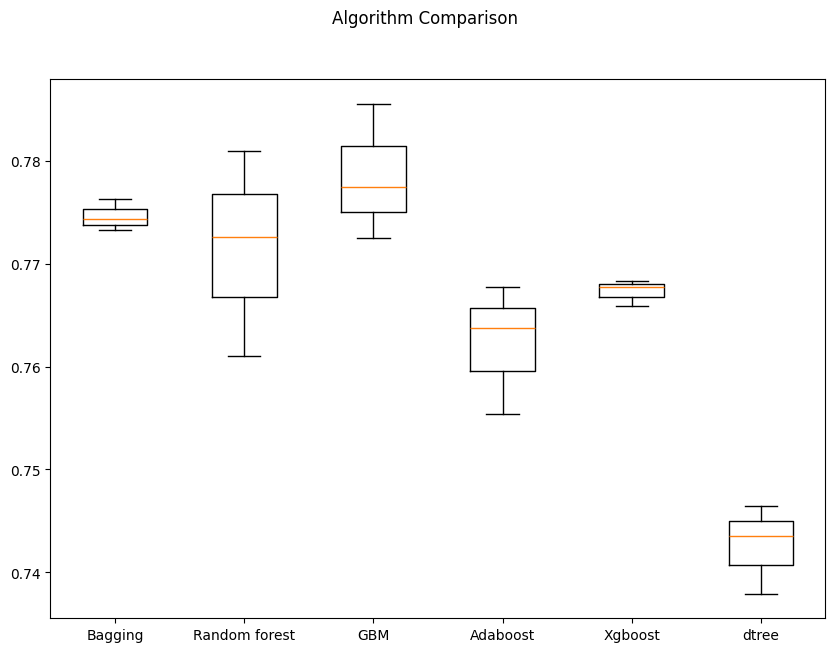

In [ ]:
import matplotlib.pyplot as plt

# Filter out models that failed (i.e., where results1 is None)
valid_results = [r for r in results1 if r is not None]
valid_names = [n for i, n in enumerate(names) if results1[i] is not None]

# Plotting boxplots for valid models
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(valid_results)
ax.set_xticklabels(valid_names)

plt.show()


### Model Building with Oversampled data

In [ ]:
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

# Proceed only if minority class exists
if sum(y_train == 1) > 0:
    sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)  # k_neighbors usually set to 5
    X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
    print("After OverSampling, counts of label '0': {}\n".format(sum(y_train_over == 0)))

    print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
    print("After OverSampling, the shape of train_y: {}\n".format(y_train_over.shape))
else:
    print("Cannot apply SMOTE because the minority class (label '1') does not exist in y_train.")


Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,)



In [ ]:
from imblearn.over_sampling import SMOTE

# Print class distribution before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

# Default to original training data
X_train_final = X_train
y_train_final = y_train

# Apply SMOTE if possible
if sum(y_train == 1) > 0:
    sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
    X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
    print("After OverSampling, counts of label '0': {}\n".format(sum(y_train_over == 0)))
    print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
    print("After OverSampling, the shape of train_y: {}\n".format(y_train_over.shape))

    # Use oversampled data for training
    X_train_final = X_train_over
    y_train_final = y_train_over
else:
    print("SMOTE cannot be applied: No positive class (label '1') in y_train.")


Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,)



In [ ]:
from collections import Counter

print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    class_counts = Counter(y_train_final)
    if len(class_counts) < 2:
        print(f"{name}: Skipped - Only one class present in training data.")
        results1.append(None)
        names.append(name)
        continue

    try:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        cv_result = cross_val_score(
            estimator=model, X=X_train_final, y=y_train_final, scoring=scorer, cv=kfold
        )
        results1.append(cv_result)
        names.append(name)
        print(f"{name}: {cv_result.mean():.4f}")
    except Exception as e:
        print(f"{name}: Failed - {str(e)}")
        results1.append(None)
        names.append(name)



Cross-Validation performance on training dataset:

Bagging: 0.7674
Random forest: 0.7695
GBM: 0.7620
Adaboost: 0.7428
Xgboost: 0.7593
dtree: 0.7285


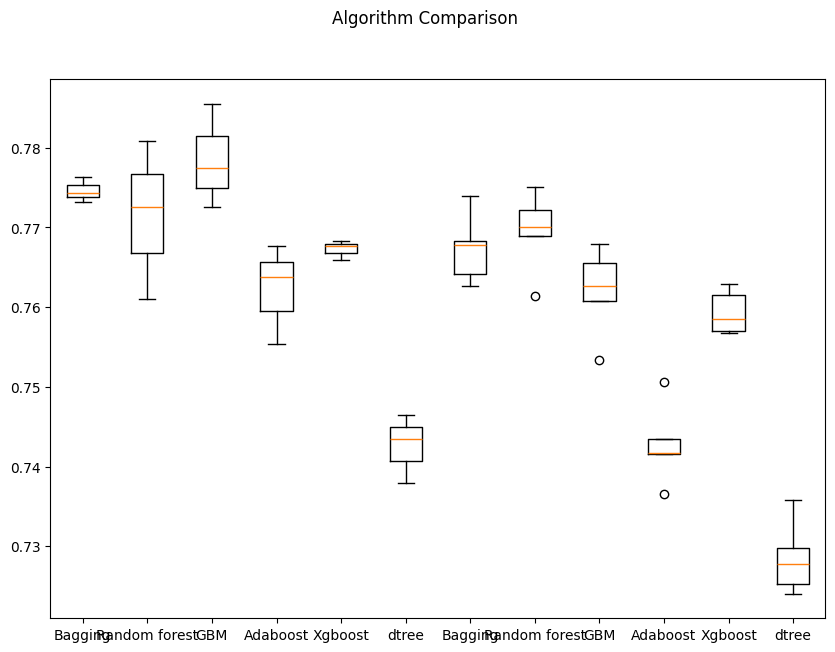

In [ ]:
# Remove None values for plotting
valid_results = [r for r in results1 if r is not None]
valid_names = [names[i] for i in range(len(results1)) if results1[i] is not None]

# Plotting boxplots only for valid results
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(valid_results)
ax.set_xticklabels(valid_names)
plt.show()


### Model Building with Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
    estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6832581175910596
Random forest: 0.6920425073211518
GBM: 0.7076890303881316
Adaboost: 0.6811726262122082
Xgboost: 0.6925084798467304
dtree: 0.6163099821610538

Validation Performance:

Bagging: 0.6916956737941323
Random forest: 0.734144015259895
GBM: 0.7608695652173914
Adaboost: 0.7604202747950584
Xgboost: 0.7423652871123688
dtree: 0.6839080459770115


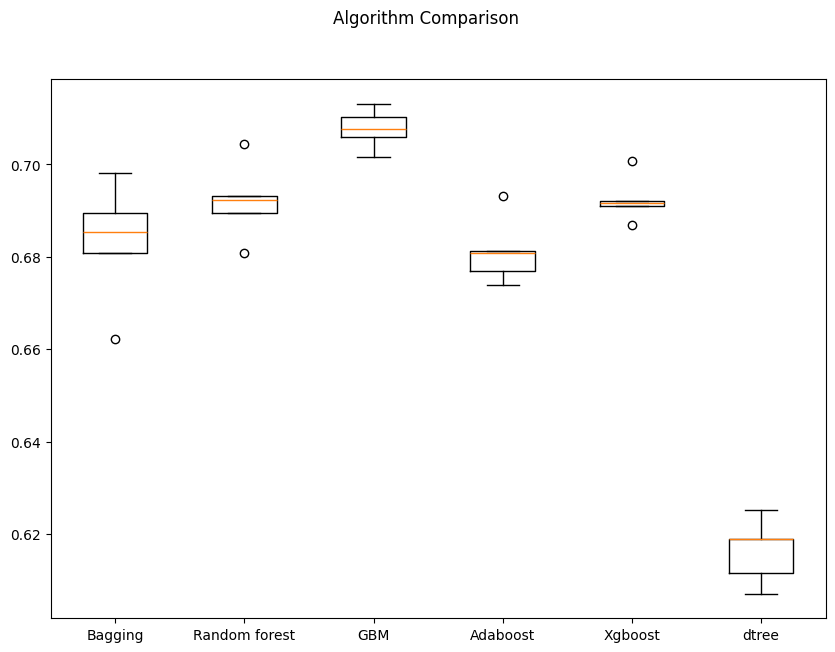

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

### Tuning AdaBoost using Oversampled data

In [ ]:
from imblearn.over_sampling import SMOTE

# Only perform SMOTE if there are two classes in the data
if len(set(y_train)) > 1:
    smote = SMOTE(random_state=1)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    print("SMOTE applied: Oversampled data created.")
else:
    print("SMOTE skipped: y_train contains only one class.")


SMOTE applied: Oversampled data created.


In [ ]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.1, 0.5],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)
    ]
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=4,
    n_jobs=1,  # Use 1 core to avoid serialization errors in Jupyter/Colab
    scoring=scorer,
    cv=5,
    random_state=1
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_bal, y_train_bal)  #use oversampled training data


CPU times: user 32.1 s, sys: 38.4 ms, total: 32.2 s
Wall time: 34 s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_iter=4,
                   n_jobs=1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [0.1, 0.5],
                                        'n_estimators': [50, 100]},
                   random_state=1,
                   scoring=make_scorer(precision_score, response_method='predict'))

In [ ]:
# Print best parameters and corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7485376692653549:


In [ ]:
# Retrieve the best estimator from RandomizedSearchCV
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.5, random_state=1)

In [ ]:
# Fit tuned AdaBoost on oversampled data
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.5, random_state=1)

In [ ]:
# Evaluate tuned AdaBoost on training data
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.789138,0.854948,0.755508,0.802158


In [ ]:
# Check the model performance for validation data
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.7347,0.849586,0.774866,0.810508


### Tuning Random forest using Undersampled data

In [ ]:
# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Print class distribution before undersampling
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Print class distribution after undersampling
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

# Print shape of undersampled training data
print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [ ]:
# Create list of models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # To store all model CV scores
names = []     # To store model names

# Cross-Validation performance
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)  # 3-fold for speed
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_un,
        y=y_train_un,
        scoring=scorer,
        cv=kfold,
        n_jobs=1  # Use single core in Jupyter/Colab
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Validation performance
print("\nValidation Performance:\n")

# Save Random Forest model separately for later use
tuned_rf = None  # define beforehand

for name, model in models:
    model.fit(X_train_un, y_train_un)  # Fit on undersampled data

    # Default scoring metric: F1 Score (you can change if needed)
    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))

    # Save Random Forest model for later performance analysis
    if name == "Random forest":
        tuned_rf = model


Cross-Validation performance on training dataset:

Bagging: 0.68261059775972
Random forest: 0.6902680497668255
GBM: 0.7058751376798194
Adaboost: 0.6860305835758961
Xgboost: 0.6838559504644947
dtree: 0.6201819381833046

Validation Performance:

Bagging: 0.6916956737941323
Random forest: 0.734144015259895
GBM: 0.7608695652173914
Adaboost: 0.7604202747950584
Xgboost: 0.7423652871123688
dtree: 0.6839080459770115


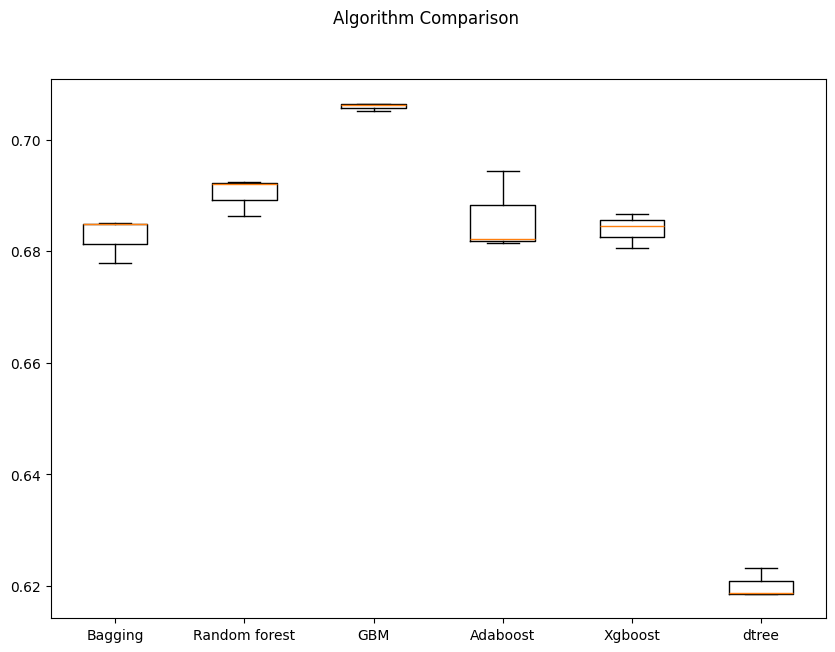

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Tuning with Gradient boosting with Oversampled data

In [ ]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid = {
    "n_estimators": [50, 100],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "max_features": ["sqrt", None]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=8,  # Try fewer combinations
    n_jobs=1,  # Safer in notebook environments
    scoring=scorer,
    cv=3,  # Fewer folds, faster training
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_bal, y_train_bal)

CPU times: user 37.2 s, sys: 77.4 ms, total: 37.3 s
Wall time: 37.7 s


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=8, n_jobs=1,
                   param_distributions={'learning_rate': [0.05, 0.1],
                                        'max_features': ['sqrt', None],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(precision_score, response_method='predict'))

In [ ]:
# Display best hyperparameters and CV score from randomized search
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'max_features': 'sqrt', 'learning_rate': 0.1} with CV score=0.7451925115975951:


In [ ]:
# Retrieve the best estimator from randomized search
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(max_features='sqrt', random_state=1, subsample=0.8)

In [ ]:
# Evaluate tuned Gradient Boosting model on oversampled training data
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.794049,0.8552,0.762004,0.805917


In [ ]:
##Print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.733391,0.846104,0.775229,0.809117


### Tuning XGBoost using Oversampled data

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

##Define the hyperparameters
param_grid={
    'n_estimators': [50, 100],               # Small number of trees
    'subsample': [0.8, 1.0],                 # Reasonable sampling rates
    'gamma': [0, 1],                         # Regularization term
    'colsample_bytree': [0.8, 1.0],          # Feature sampling by tree
    'colsample_bylevel': [0.8, 1.0]          # Feature sampling by level
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=3,
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

CPU times: user 46.6 s, sys: 315 ms, total: 47 s
Wall time: 28.5 s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.8, 1.0],
                                        'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 1],
                                        'n_estimators': [50, 100],
                                        'subsample': [0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(precision_score, response_method='predict'))

In [ ]:
# Print best hyperparameters and cross-validation score
print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 100, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 1.0} with CV score=0.7623751427363347:


In [ ]:
# Get the best XGBoost model from randomized search
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Evaluate tuned XGBoost model on oversampled training data
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.853479,0.901872,0.822287,0.860243


In [ ]:
##Print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.727577,0.840662,0.771783,0.804751


## Model Performance Summary and Final Model Selection

In [ ]:
# Make sure tuned_rf exists before this
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)

# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T,
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.794049,0.853479,0.789138,1.0
Recall,0.855200,0.901872,0.854948,1.0
Precision,0.762004,0.822287,0.755508,1.0
F1,0.805917,0.860243,0.802158,1.0


In [ ]:
# Compute validation performance for tuned Random Forest
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf, X_val, y_val)

# Validation performance comparison
models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T,
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]

print("Validation performance comparison:")
models_val_comp_df


Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.733391,0.727577,0.734700,0.675825
Recall,0.846104,0.840662,0.849586,0.670222
Precision,0.775229,0.771783,0.774866,0.811545
F1,0.809117,0.804751,0.810508,0.734144


## Actionable Insights and Recommendations

---

### ✅ Key Insights and Recommendations

#### 1. Control Review Rigor Based on Segmentation Patterns
Data reveals that certain variables significantly drive approval outcomes. OFLC should use these insights to apply **differentiated review rigor**:

- Applicants matching high-certainty profiles (e.g., common job titles, large employers, favorable locations) can undergo standard/automated review.
- Unusual or low-certainty applications may be flagged for detailed manual evaluation.

This targeted approach optimizes resource allocation while preserving fairness and accuracy.

---

#### 2. Prioritize Review Based on Region of Employment

- The `region_of_employment_South` variable showed strong correlation with higher approval rates.
- Conversely, applications from certain other regions had less predictive power or lower approval likelihood.

**Recommendation**:  
OFLC can introduce **region-based review stratification**. Applications from historically high-certification regions (e.g., South, Midwest) can follow a fast-track pipeline, while applications from regions with uncertain trends should be assigned more cautious or thorough evaluation.

---

#### 3. Leverage Employer Size in Decision Routing

- Employers classified as **large-sized** demonstrated higher approval probabilities in the model.
- These organizations are likely more familiar with the process and compliant with documentation requirements.

**Recommendation**:  
OFLC may assign lower manual validation burden for large employers, streamlining the process and reducing false negatives for valid cases.

---

#### 4. Incorporate Job Role Type in Screening Logic

- Certain job roles (e.g., software developers, analysts) were associated with higher approval rates, likely due to demand-supply alignment and historical patterns.
- Other less common or ambiguous job titles correlated with increased uncertainty.

**Recommendation**:  
OFLC should use job role classification as part of a risk filter. Approvals for well-supported, in-demand roles can be fast-tracked, while edge cases or poorly defined occupations can be reviewed more thoroughly.

---

#### 5. Implement Pre-screening Using ML Predictions

- The machine learning model achieves high recall (above 0.85 in best models), meaning it successfully flags most positively certifiable applications.
- Using this model as a **first-pass triage tool** can reduce human workload by focusing attention where it’s needed most.

**Recommendation**:  
Deploy the classification model to assign risk scores to incoming applications. Use thresholds to separate likely-approved, uncertain, and likely-denied segments — each with appropriate review protocols.

---

### 📌 Conclusion

By embedding data-driven logic into the visa review process, OFLC can improve operational efficiency, maintain decision fairness, and keep pace with rising application volumes. The patterns identified through our modeling provide a solid foundation for intelligent automation and targeted human oversight.


## Convert to HTML

In [ ]:
# Convert Jupyter notebook to HTML format
!jupyter nbconvert --to html '/content/drive/MyDrive/Python/ML/EasyVisa_Full_Code_Notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/ML/EasyVisa_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1249930 bytes to /content/drive/MyDrive/Python/ML/EasyVisa_Full_Code_Notebook.html
